In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os,h5py
from skimage.restoration import unwrap_phase

/home/sajid/miniconda3/envs/ipy3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
steps_fd  = np.arange(1,126)

rms_fd = []

FD = []

In [3]:
dim_x,dim_y = 16384,16384

os.chdir('/raid/home/sajid/xwp_petsc_data/16384x16384/plots/step_plot/bebop_data')
for i in steps_fd:
    f_fd = h5py.File('sol_'+str(i)+'.h5','r')
    dset_fd = f_fd['sol_vec']
    f1 = np.zeros((dim_x))
    f2 = np.zeros((dim_x))
    dset_fd.read_direct(f1,np.s_[dim_x//2,:,0],np.s_[:])
    dset_fd.read_direct(f2,np.s_[dim_x//2,:,1],np.s_[:])
    F = f1 + 1j*f2
    f_fd.close()
    FD.append(F)

In [4]:
for i in range(len(steps_fd)):
    _fd  = unwrap_phase(np.angle(FD[i])[16384-3750:16384+3750]) - np.mean(unwrap_phase(np.angle(FD[i])[16384-3750:16384+3750]))
    _ref = unwrap_phase(np.angle(FD[-1])[16384-3750:16384+3750]) - np.mean(unwrap_phase(np.angle(FD[-1])[16384-3750:16384+3750]))
    _rms = np.sqrt(np.sum((_fd-_ref)**2)*(1/len(_ref)))
    rms_fd.append(_rms)

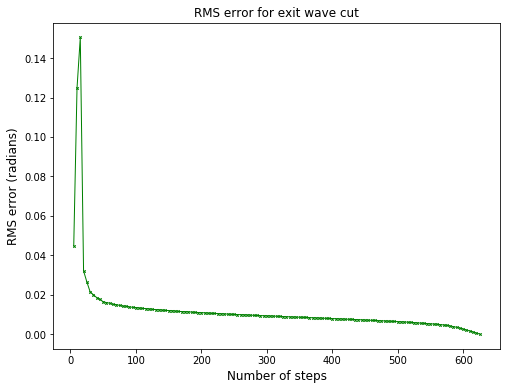

In [5]:
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams['lines.markersize'] = 2.5
plt.rcParams['lines.linewidth'] = 1

fig,ax = plt.subplots(1,1)

ax.plot(steps_fd*5,rms_fd,'gx-')
ax.set_xlabel('Number of steps',size=12)
ax.set_ylabel('RMS error (radians)',size=12)

ax.set_title('RMS error for exit wave cut')
plt.savefig("step_plot.svg",format='svg',dpi=250)